Análise de vendas, aprofundamento no mês de Dezembro de 2020

In [88]:
#importando as bibliotecas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
#obtendo os dados
df = pd.read_csv("/kaggle/input/vendas/tudo.csv")

In [134]:
#inspecionando as 5 primeiras linhas
df.head(5)

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net


In [135]:
df.tail(5)

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.3,3.00000,3455.70,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.3,2.45209,1896.10,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.3,3.08220,3997.90,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.3,1.00000,2695.00,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44499,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.3,2.17575,1267.55,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net


In [91]:
#verificando a quantidade de linhas e colunas
df.shape

(44500, 10)

In [92]:
#verificando os nomes de colunas do dataset
df.columns

Index(['name', 'sale_id', 'product_id', 'product', 'price_y', 'quantity',
       'price_x', 'created_at', 'updated_at', 'email'],
      dtype='object')

In [93]:
#resumo estatistico do dataset de vendas, podemos obter alguns insights
df.describe()

,product_id,price_y,quantity,price_x
count,44500.000000,44500.000000,44500.000000,44500.000000
mean,300.387640,1897.930295,2.505359,1999.161519
std,57.734845,1144.833746,1.446676,1155.451744
min,201.000000,58.000000,0.000000,0.055818
25%,250.000000,902.364000,1.241923,994.173000
50%,300.000000,1754.000000,2.500000,2001.355000
75%,350.000000,2988.600000,3.779000,3001.707500
max,400.000000,3982.340000,5.000000,4000.000000


In [94]:
#informações de tipos de dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44500 entries, 0 to 44499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        44500 non-null  object 
 1   sale_id     44500 non-null  object 
 2   product_id  44500 non-null  int64  
 3   product     44500 non-null  object 
 4   price_y     44500 non-null  float64
 5   quantity    44500 non-null  float64
 6   price_x     44500 non-null  float64
 7   created_at  44500 non-null  object 
 8   updated_at  44500 non-null  object 
 9   email       44500 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.4+ MB


In [95]:
#verificando se há algum valor ausente no data set,e não há.
df.isnull().sum()

name          0
sale_id       0
product_id    0
product       0
price_y       0
quantity      0
price_x       0
created_at    0
updated_at    0
email         0
dtype: int64

In [96]:
#filtrando o mês de dezembro de 2019
dezembro_2019 = df.loc[(df['created_at'] >= '2019-12-01') & (df['created_at'] <= '2019-12-31')]

In [97]:
#mostrar primeiras linhas de dezembro_2020
dezembro_2020.head(10)

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
4415,Hassan Beatty,6ca52ba9-20b4-32b1-a09e-3078c0f59ba2,269,German Place,664.734,1.65432,3994.400,2019-12-15 02:53:26+00:00,2000-12-26 02:32:33+00:00,collier.allie@example.com
4416,Hassan Beatty,6ca52ba9-20b4-32b1-a09e-3078c0f59ba2,269,German Place,664.734,3.93682,2572.460,2019-12-15 02:53:26+00:00,2000-12-26 02:32:33+00:00,collier.allie@example.com
4417,Hassan Beatty,6ca52ba9-20b4-32b1-a09e-3078c0f59ba2,269,German Place,664.734,4.12070,2863.000,2019-12-15 02:53:26+00:00,2000-12-26 02:32:33+00:00,collier.allie@example.com
4418,Hassan Beatty,6ca52ba9-20b4-32b1-a09e-3078c0f59ba2,269,German Place,664.734,4.04000,3664.510,2019-12-15 02:53:26+00:00,2000-12-26 02:32:33+00:00,collier.allie@example.com
8051,Dr. Parker Dare,b5e2244b-ad51-3429-932c-7093c32ed382,291,Williamson Mission,2638.790,3.43000,2332.720,2019-12-05 03:15:18+00:00,1983-11-20 13:11:20+00:00,dale74@example.com
8053,Dr. Parker Dare,b5e2244b-ad51-3429-932c-7093c32ed382,291,Williamson Mission,2638.790,4.27933,505.465,2019-12-05 03:15:18+00:00,1983-11-20 13:11:20+00:00,dale74@example.com
8054,Dr. Parker Dare,b5e2244b-ad51-3429-932c-7093c32ed382,291,Williamson Mission,2638.790,0.46600,2016.400,2019-12-05 03:15:18+00:00,1983-11-20 13:11:20+00:00,dale74@example.com
8056,Dr. Parker Dare,b5e2244b-ad51-3429-932c-7093c32ed382,291,Williamson Mission,2638.790,2.01054,854.081,2019-12-05 03:15:18+00:00,1983-11-20 13:11:20+00:00,dale74@example.com
10962,Marty Medhurst III,940605f3-bb3f-368a-b962-9d08d6d562e5,214,Melissa Unions,3917.660,1.64568,2258.000,2019-12-06 05:13:55+00:00,2013-11-21 17:54:29+00:00,deonte23@example.com
10963,Marty Medhurst III,940605f3-bb3f-368a-b962-9d08d6d562e5,214,Melissa Unions,3917.660,3.00000,2019.390,2019-12-06 05:13:55+00:00,2013-11-21 17:54:29+00:00,deonte23@example.com


In [98]:
print(f"A receita total do mês Dezembro de 2020 é {dezembro_2020['price_x'].sum()}")
print(f"A quantidade total de produtos vendidos em Dezembro de 2020 é {dezembro_2020['quantity'].sum()}")

A receita total do mês Dezembro de 2020 é 163900.67
A quantidade total de produtos vendidos em Dezembro de 2020 é 232.4321106


In [99]:
#clientes que mais compraram
dezembro_2020['name'].value_counts()

name
Myrna Reilly            6
Margaret Beatty         6
Marta Schimmel Jr.      5
Tianna Johns V          5
Philip Walker I         5
Alta Mayer              5
Ashlynn Jaskolski       5
Dr. Zander Okuneva      4
Prof. Daphnee Kemmer    4
Laverne Marvin          4
Dr. Parker Dare         4
Porter Strosin          4
Carrie Walsh            4
Jaime Hackett Jr.       4
Reid McGlynn            4
Eulah Torp              4
Marty Medhurst III      4
Clark Flatley PhD       4
Susie Gutkowski         4
Hassan Beatty           4
Name: count, dtype: int64

In [100]:
receita_por_produto = dezembro_2020.groupby('product')['price_x'].sum().reset_index()
receita_por_produto = receita_por_produto.sort_values(by='price_x', ascending=False)

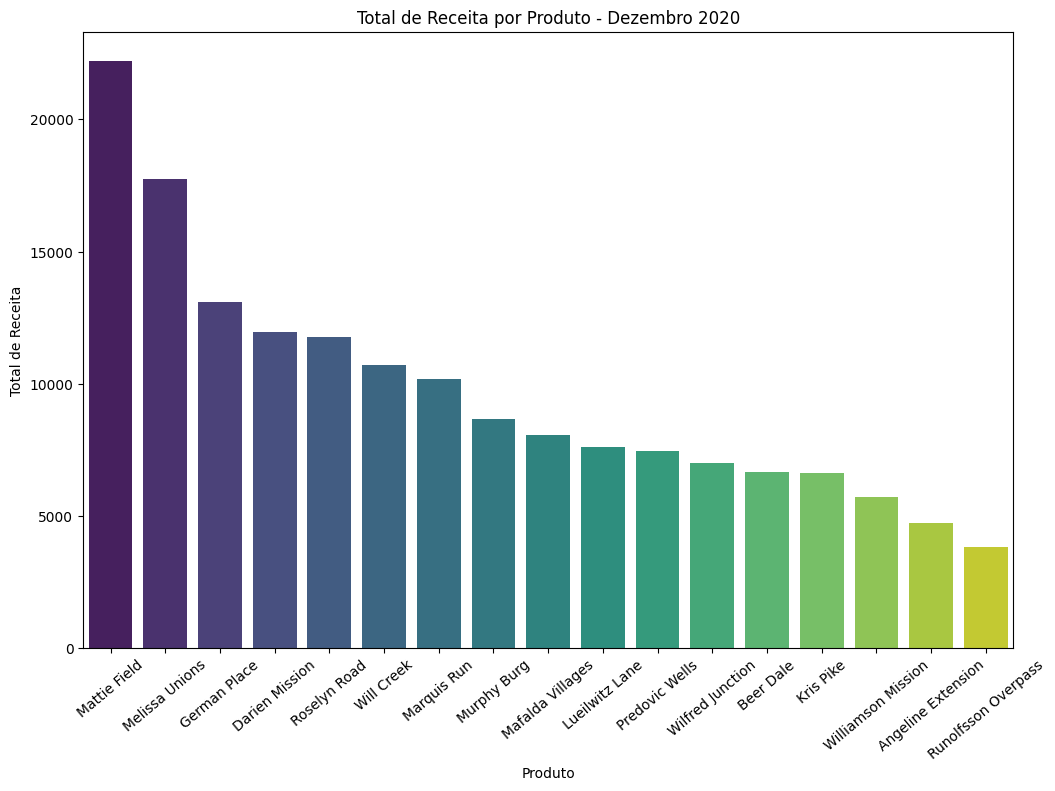

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(x='product', y='price_x', data=receita_por_produto, palette='viridis')
plt.title('Total de Receita por Produto - Dezembro 2020')
plt.xlabel('Produto')
plt.ylabel('Total de Receita')
plt.xticks(rotation=40)  # Rotacionar os rótulos do eixo x se necessário
plt.show()

In [102]:
quantidade_por_produto = dezembro_2020.groupby('product')['quantity'].sum().reset_index()
quantidade_por_produto = quantidade_por_produto.sort_values(by='quantity', ascending=False)


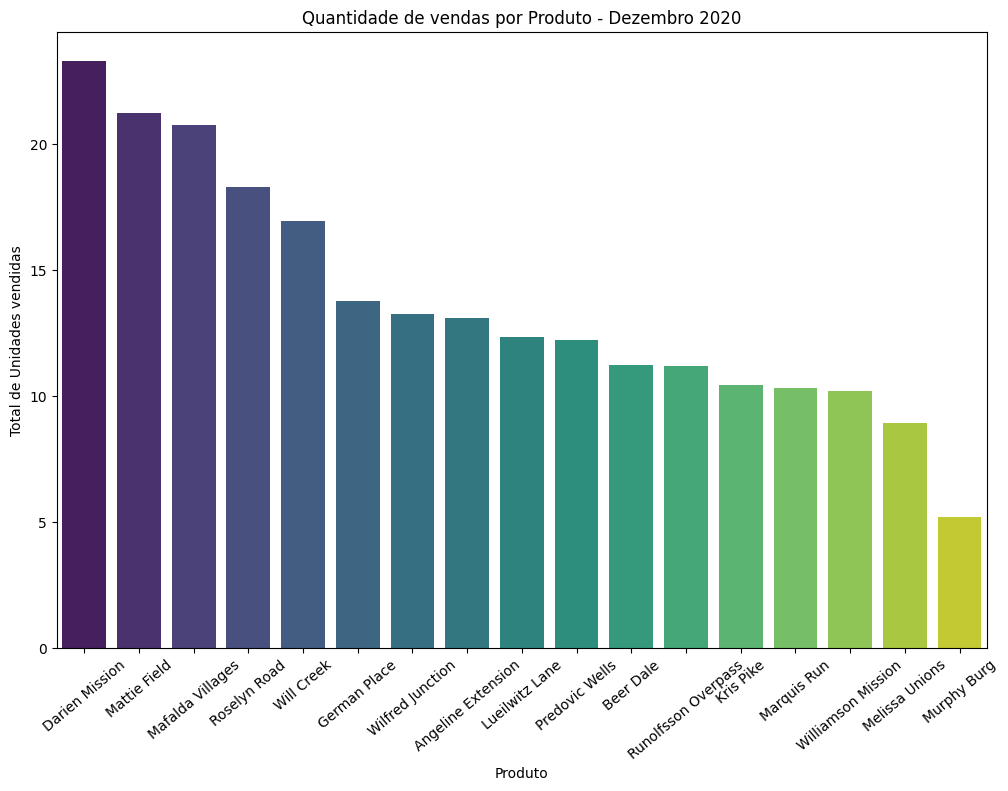

In [132]:
plt.figure(figsize=(12, 8))

sns.barplot(x='product', y='quantity', data=quantidade_por_produto, palette='viridis')
plt.title('Quantidade de vendas por Produto - Dezembro 2020')
plt.xlabel('Produto')
plt.ylabel('Total de Unidades vendidas')
plt.xticks(rotation=40)  # Rotacionar os rótulos do eixo x se necessário
plt.show()

Verificamos que o produto mais vendido em Dezembro foi o Darien Mission e o menos vendido o Murphy, este fato não se liga à receita gerada por estes, pois o Mattie Field gerou mais receita e o Murphy Burg não o foi o de menor receita.
Dito isso, vamos analisar o preço dos produtos.

In [110]:
dezembro_2020.loc[:, 'receita'] = dezembro_2020['quantity'] * dezembro_2020['price_x']
total_vendas = dezembro_2020.groupby('product').agg({'quantity': 'sum', 'receita': 'sum'}).reset_index()

In [112]:
mais_vendidos = total_vendas.sort_values(by='quantity', ascending=False)
maior_receita = total_vendas.sort_values(by='receita', ascending=False)

In [113]:
print("Produtos mais vendidos:")
print(mais_vendidos.head())

Produtos mais vendidos:
             product   quantity       receita
2     Darien Mission  23.273120  33711.843144
8       Mattie Field  21.210594  50878.336653
6   Mafalda Villages  20.750520  28071.013602
12      Roselyn Road  18.280400  41282.072598
15        Will Creek  16.922580  36815.462147


In [114]:
print("\nProdutos com maior receita:")
print(maior_receita.head())


Produtos com maior receita:
           product   quantity       receita
8     Mattie Field  21.210594  50878.336653
3     German Place  13.751840  43337.512285
12    Roselyn Road  18.280400  41282.072598
15      Will Creek  16.922580  36815.462147
2   Darien Mission  23.273120  33711.843144


In [115]:
total_vendas['receita_media_por_unidade'] = total_vendas['receita'] / total_vendas['quantity']
print(total_vendas.sort_values(by='receita_media_por_unidade', ascending=False).head())

           product   quantity       receita  receita_media_por_unidade
3     German Place  13.751840  43337.512285                3151.397361
9   Melissa Unions   8.915948  23875.495856                2677.841653
7      Marquis Run  10.294990  26950.382366                2617.815303
8     Mattie Field  21.210594  50878.336653                2398.722858
12    Roselyn Road  18.280400  41282.072598                2258.269655


In [128]:
#vendas diárias
vendas_diarias = dezembro_2020.groupby(dezembro_2020['created_at'].dt.date)['receita'].sum().reset_index()

print("Vendas Diárias em Dezembro:")
print(vendas_diarias)

Vendas Diárias em Dezembro:
    created_at       receita
0   2019-12-03  26950.382366
1   2019-12-05  35839.776826
2   2019-12-06  11331.702772
3   2019-12-08  10730.067077
4   2019-12-10  41282.072598
5   2019-12-13  20178.657051
6   2019-12-15  43337.512285
7   2019-12-20  19488.615557
8   2019-12-23  10631.747342
9   2019-12-24  13533.186092
10  2019-12-25  38599.040027
11  2019-12-27  22338.566173
12  2019-12-28  75682.765944
13  2019-12-29  17597.852822
14  2019-12-30  30308.762122


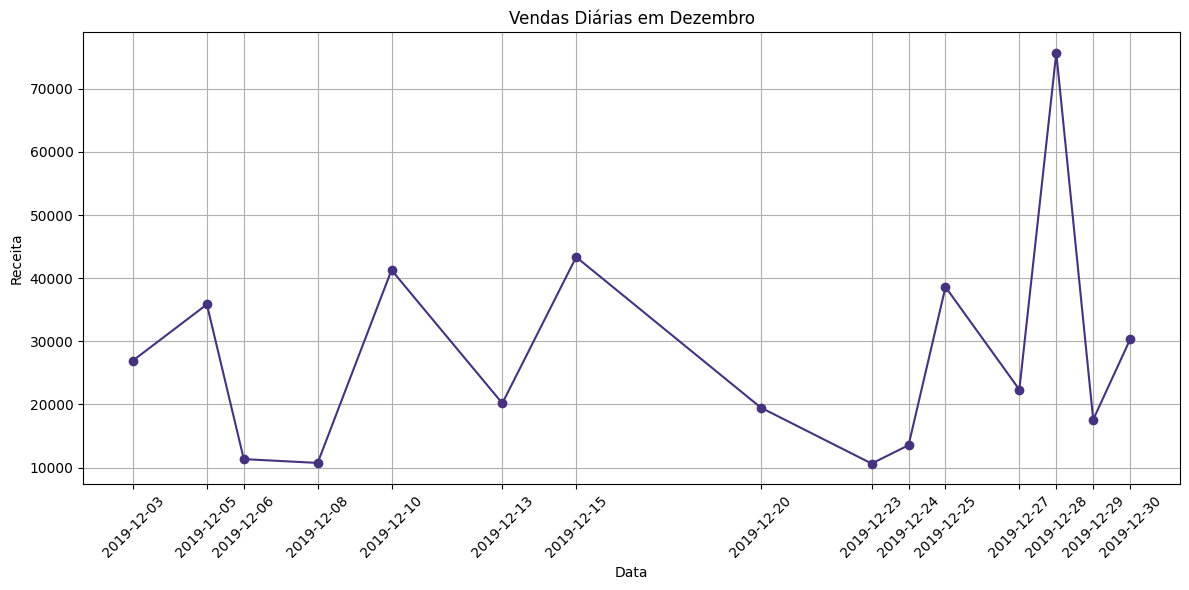

In [133]:
plt.figure(figsize=(12, 6))

sns.set_palette("viridis")
plt.plot(vendas_diarias['created_at'], vendas_diarias['receita'], marker='o', linestyle='-')


plt.title('Vendas Diárias em Dezembro')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.xticks(vendas_diarias['created_at'], rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização


plt.grid(True)
plt.tight_layout()
plt.show()